In [16]:
import pandas as pd
import numpy as np
olympics = pd.read_csv('C:/Users/cm44/Desktop/athlete_events.csv')
olympics.head()
olympics['Medal'].fillna('DNW', inplace = True)
noc_country = pd.read_csv('C:/Users/cm44/Desktop/noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()
Merge_olympics = olympics.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')
world_gdp = pd.read_csv('C:/Users/cm44/Desktop/world_gdp.csv', skiprows = 3)

# Remove unnecessary columns
world_gdp.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

# The columns are the years for which the GDP has been recorded. This needs to brought into a single column for efficient
# merging.
world_gdp = pd.melt(world_gdp, id_vars = ['Country Name', 'Country Code'], var_name = 'Year', value_name = 'GDP')

# convert the year column to numeric
world_gdp['Year'] = pd.to_numeric(world_gdp['Year'])

world_gdp.head()

merge_olympics_countrycode = Merge_olympics.merge(world_gdp[['Country Name', 'Country Code']].drop_duplicates(),
                                            left_on = 'Team',
                                            right_on = 'Country Name',
                                            how = 'left')

merge_olympics_countrycode.drop('Country Name', axis = 1, inplace = True)

# Merge to get gdp too
olympics_merge_gdp = merge_olympics_countrycode.merge(world_gdp,
                                                left_on = ['Country Code', 'Year'],
                                                right_on = ['Country Code', 'Year'],
                                                how = 'left')

olympics_merge_gdp.drop('Country Name', axis = 1, inplace = True)


world_population = pd.read_csv('C:/Users/cm44/Desktop/world_pop.csv')

world_population.drop(['Indicator Name', 'Indicator Code'], axis = 1, inplace = True)

world_population = pd.melt(world_population, id_vars = ['Country', 'Country Code'], var_name = 'Year', value_name = 'Population')

# Change the Year to integer type
world_population['Year'] = pd.to_numeric(world_population['Year'])

world_population.head()


olympics_new = olympics_merge_gdp.merge(world_population,
                                            left_on = ['Country Code', 'Year'],
                                            right_on= ['Country Code', 'Year'],
                                            how = 'left')

olympics_new.drop('Country_y', axis = 1, inplace = True)

olympics_new.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country_x,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560550e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585680e+11,1.476009e+07
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NLD,2.585680e+11,1.476009e+07
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,3.583300e+11,1.518417e+07
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NLD,3.583300e+11,1.518417e+07
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,3.742910e+11,1.538284e+07
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands,NLD,3.742910e+11,1.538284e+07


Populating the interactive namespace from numpy and matplotlib


Text(4769654000000.016, 143.0, 'Correlation = 0.5765800001316688')

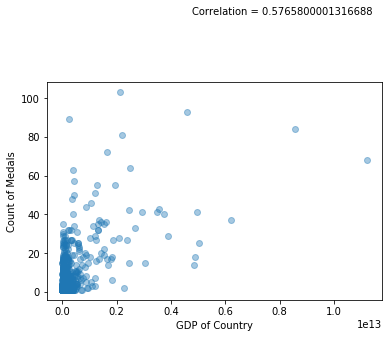

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
olympics_merge = olympics_new.loc[(olympics_new['Year'] > 1960) & (olympics_new['Season'] == "Summer"), :]

# Reset row indices
olympics_merge = olympics_merge.reset_index()



olympics1 = pd.read_csv('C:/Users/cm44/Desktop/athlete_events.csv',encoding="ISO-8859–1")
olympics = pd.read_csv('C:/Users/cm44/Desktop/host_country.csv',encoding="ISO-8859–1")
mergedframe = pd.merge(olympics1, olympics, left_on='City', right_on='Host City', how ='inner')

import numpy as np
mergedframe['Medal'].fillna('DNW', inplace = True)
mergedframe['Medal_Won'] = np.where(mergedframe.loc[:,'Medal'] == 'DNW', 0, 1)
team_events = pd.pivot_table(mergedframe,
                                      index = ['Team', 'Year_x', 'Event'],
                                      columns = 'Medal',
                                      values = 'Medal_Won',
                                      aggfunc = 'sum',
                                     fill_value = 0).drop('DNW', axis = 1).reset_index()



team_events = team_events.loc[team_events['Gold'] > 1, :]
team_sports = team_events['Event'].unique()



remove = ["Gymnastics Women's Balance Beam", "Gymnastics Men's Horizontal Bar", 
                 "Swimming Women's 100 metres Freestyle", "Swimming Men's 50 metres Freestyle"]
team_sports = list(set(team_sports) - set(remove))



team_var = mergedframe['Event'].map(lambda x: x in team_sports)
singleEvent = [not i for i in team_event_mask]



# rows where medal_won is 1
#medal_mask = mergedframe['Medal_Won'] == 1





mergedframe['Team_Event'] = np.where(team_var & medal_mask, 1, 0)




# Put 1 under singles event if medal is won and event not in team event list
mergedframe['Single_Event'] = np.where(singleEvent & medal_mask, 1, 0)




# Add an identifier for team/single event
mergedframe['Event_Category'] = mergedframe['Single_Event'] + mergedframe['Team_Event']
temp_medaltally = mergedframe.groupby(['Year_x', 'Team', 'Event', 'Medal'])[['Medal_Won', 'Event_Category']].agg('sum').reset_index()
temp_medaltally['Medal_Won_Corrected'] = temp_medaltally['Medal_Won']/temp_medaltally['Event_Category']

# print(medal_tally_agnostic)
medalTotal = temp_medaltally.groupby(['Year_x','Team'])['Medal_Won_Corrected'].agg('sum').reset_index()

#year_team_gdp = olympics_merge.loc[:, ['Year', 'Team', 'GDP']].drop_duplicates()

medalTotal_gdp = medalTotal.merge(year_team_gdp,
                                   left_on = ['Year_x', 'Team'],
                                   right_on = ['Year', 'Team'],
                                   how = 'left')
top_countries = ['United States']
row5 = medalTotal_gdp['Medal_Won_Corrected'] > 0
#row6 = medalTotal_gdp['Team'].map(lambda x: x in top_countries)

correlation = medalTotal_gdp.loc[row5, ['GDP', 'Medal_Won_Corrected']].corr()['Medal_Won_Corrected'][0]

plot(medalTotal_gdp.loc[row5, 'GDP'], 
     medalTotal_gdp.loc[row5, 'Medal_Won_Corrected'] , 
     linestyle = 'none', 
     marker = 'o',
    alpha = 0.4)
xlabel('GDP of Country')

ylabel('Count of Medals')
text(np.nanpercentile(medal_tally_gdp['GDP'], 99.6), 
     max(medal_tally_gdp['Medal_Won_Corrected']) - 50,
     "Correlation = " + str(correlation))